## How are in-demand skills trending for Data Analysts?

### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
#importing libraries 

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\admin\anaconda1\envs\Project_Data\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#filter specific country and job title
country = 'France'
title = 'Data Analyst'
df_country_job = df[(df['job_country']== country) & (df['job_title_short'] == title)].copy()

In [7]:
df_country_job['job_posted_month_no'] = df_country_job['job_posted_date'].dt.month

In [8]:
df_explode = df_country_job.explode('job_skills')

In [12]:
df_explode_pivot = df_explode.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size',fill_value=0)

In [13]:
df_explode_pivot.loc['Total'] = df_explode_pivot.sum()


In [23]:
df_pivot = df_explode_pivot[df_explode_pivot.loc['Total'].sort_values(ascending=False).index]

df_pivot = df_pivot.drop('Total')

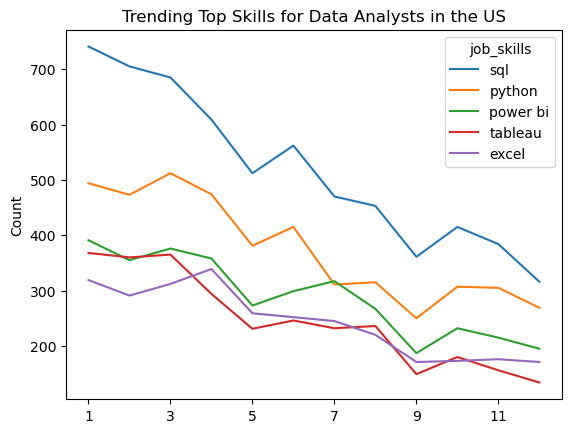

In [31]:
df_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in df_country_job by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in job_totals. This is needed to compute the percentages.

In [24]:
job_totals = df_country_job.groupby('job_posted_month_no').size()

In [39]:
df_percent = df_pivot.div(job_totals/100,axis=0)

df_percent

job_skills,sql,python,power bi,tableau,excel,sas,r,vba,sap,azure,...,dplyr,elixir,opencv,hugging face,ibm cloud,rust,puppet,nuxt.js,phoenix,esquisse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,47.837314,31.891543,25.242092,23.757263,20.593932,25.564881,13.169787,6.778567,4.325371,4.777276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.064558,0.000000,0.000000
2,45.308483,30.398458,22.814910,23.136247,18.701799,22.236504,13.946015,8.161954,4.498715,5.077121,...,0.064267,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.064267,0.000000
3,44.307891,33.117723,24.320828,23.609314,20.181113,21.992238,15.006468,5.950841,5.498060,5.109961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,41.855670,32.577320,24.604811,20.206186,23.298969,25.567010,13.676976,6.666667,5.704467,5.498282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,44.872918,33.391762,23.926380,20.245399,22.699387,20.683611,13.234005,8.764242,5.258545,6.310254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,45.915033,33.905229,24.428105,20.098039,20.588235,17.156863,13.888889,6.127451,4.330065,5.637255,...,0.000000,0.000000,0.000000,0.000000,0.081699,0.000000,0.00000,0.000000,0.000000,0.000000
7,42.457091,28.093948,28.635953,20.957543,22.131888,14.995483,11.382114,6.955736,6.865402,6.413731,...,0.000000,0.090334,0.090334,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
8,47.335423,32.915361,27.899687,24.660397,22.988506,18.599791,14.211076,6.165099,8.045977,7.732497,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,47.814570,33.112583,24.768212,19.735099,22.649007,14.834437,10.463576,6.754967,8.609272,4.105960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.13245,0.000000,0.000000,0.000000


In [40]:

# changes month number to month name
df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_percent = df_percent.set_index('job_posted_month')
df_percent = df_percent.drop(columns='job_posted_month_no')

In [41]:
df_percent

job_skills,sql,python,power bi,tableau,excel,sas,r,vba,sap,azure,...,dplyr,elixir,opencv,hugging face,ibm cloud,rust,puppet,nuxt.js,phoenix,esquisse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,47.837314,31.891543,25.242092,23.757263,20.593932,25.564881,13.169787,6.778567,4.325371,4.777276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.064558,0.000000,0.000000
Feb,45.308483,30.398458,22.814910,23.136247,18.701799,22.236504,13.946015,8.161954,4.498715,5.077121,...,0.064267,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.064267,0.000000
Mar,44.307891,33.117723,24.320828,23.609314,20.181113,21.992238,15.006468,5.950841,5.498060,5.109961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Apr,41.855670,32.577320,24.604811,20.206186,23.298969,25.567010,13.676976,6.666667,5.704467,5.498282,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
May,44.872918,33.391762,23.926380,20.245399,22.699387,20.683611,13.234005,8.764242,5.258545,6.310254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Jun,45.915033,33.905229,24.428105,20.098039,20.588235,17.156863,13.888889,6.127451,4.330065,5.637255,...,0.000000,0.000000,0.000000,0.000000,0.081699,0.000000,0.00000,0.000000,0.000000,0.000000
Jul,42.457091,28.093948,28.635953,20.957543,22.131888,14.995483,11.382114,6.955736,6.865402,6.413731,...,0.000000,0.090334,0.090334,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Aug,47.335423,32.915361,27.899687,24.660397,22.988506,18.599791,14.211076,6.165099,8.045977,7.732497,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Sep,47.814570,33.112583,24.768212,19.735099,22.649007,14.834437,10.463576,6.754967,8.609272,4.105960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.13245,0.000000,0.000000,0.000000


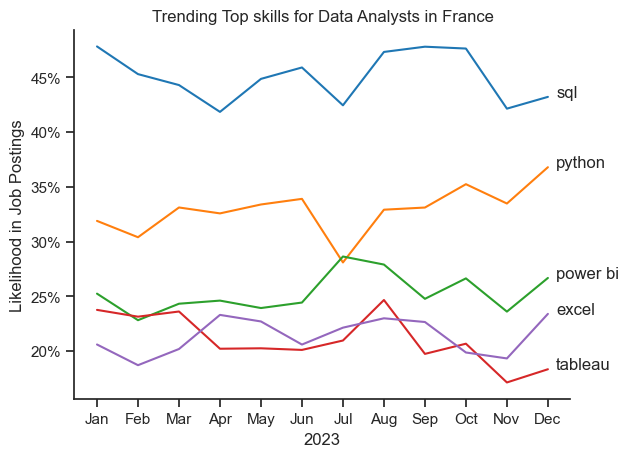

In [64]:
df_plot = df_percent.iloc[:,:5]
sns.lineplot(data=df_plot, dashes=False,palette='tab10')
sns.set_theme(style='ticks')
plt.title(f'Trending Top skills for {title}s in {country}')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.legend().remove()
sns.despine()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i])
